# Эксперименты по восстановлению профилей дисперсий в трех направлениях для NGC4150 (UGC7165)

Сначала всякие настройки и импорты

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
from numpy import poly1d, polyfit, power
import math
from math import *
from IPython.display import HTML
from IPython.display import Image
import os
import pandas as pd
import PIL as pil
import heapq
%matplotlib inline

#Размер изображений
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 12

#Наклон галактики по данным Zasov08, Noordermeer07
incl = 56

#Масштаб пк/секунда из NED
scale = 11

Всякие картинки и БД для большего удобства:

In [19]:
# Данные из SDSS DR9
HTML('<iframe src=http://skyserver.sdss3.org/dr9/en/tools/explore/obj.asp?ra=12:10:33.6&dec=+30:24:06 width=1000 height=350></iframe>')

In [20]:
# Данные из HYPERLEDA
HTML('<iframe src=http://leda.univ-lyon1.fr/ledacat.cgi?o=ngc4150 width=1000 height=350></iframe>')

In [21]:
# Данные из NED
HTML('<iframe src=http://ned.ipac.caltech.edu/cgi-bin/objsearch?objname=ngc+4150&extend=no&hconst=73&omegam=0.27&omegav=0.73&corr_z=1&out_csys=Equatorial&out_equinox=J2000.0&obj_sort=RA+or+Longitude&of=pre_text&zv_breaker=30000.0&list_limit=5&img_stamp=YES width=1000 height=350></iframe>')

In [22]:
os.chdir("C:\\science\\2FInstability\\data\\ngc4150")

#Выводим данные за header-а файла
for line in file("v_stars_maZ.dat"):
    if line[0] == '#':
        print(line)

# UGC 7165 = NGC 4150

# Zasov+08

# PA = 146 deg

# not corrected for V_sys

# inclination = 56 deg (adopted by Noordermeer+2007)

# data ARE NOT corrected for inclination

# SSBS_FUL: Cross correlation with star hd125560.ln

# Original spectra:n4150ma.ln

#  r"      v     dv  sig(TD)  dsig



Выведем также для удобства данные из обоих файлов: 

In [23]:
# pd.set_option('display.notebook_repr_html', True)
# ma = pd.read_csv('v_stars_maZ.dat', skiprows=9, sep='  ', header=False)
# display(ma)

In [24]:
# mi = pd.read_csv('v_stars_mi.dat', skiprows=9, sep='   ', header=False)
# display(mi)

Посмотрим теперь на все доступные даные по кривым вращения. Т.к. некоторые из них скорректированы, а некоторые нет, разобьем этот этап на несколько шагов.

[]

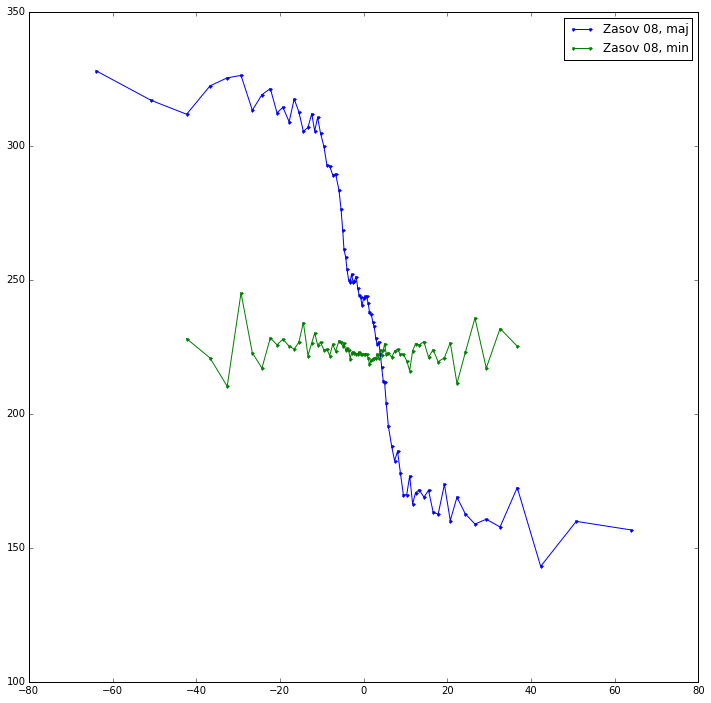

In [25]:
# Данные по звездной кинематике Засова 2008 вдоль большей полуоси, не исправленные за наклон 
zasov_raw_data = np.loadtxt("v_stars_maZ.dat", float)
r_ma, vel_ma, e_vel_ma, sig_ma, e_sig_ma = zip(*zasov_raw_data)

# Данные по звездной кинематике Засова 2008 вдоль малой полуоси, не исправленные за наклон 
zasov_raw_data = np.loadtxt("v_stars_miZ.dat", float)
r_mi, vel_mi, e_vel_mi, sig_mi, e_sig_mi = zip(*zasov_raw_data)

plt.plot(r_ma, vel_ma, '.-', label="Zasov 08, maj")
plt.plot(r_mi, vel_mi, '.-', label="Zasov 08, min")
plt.legend()
plt.plot()

[]

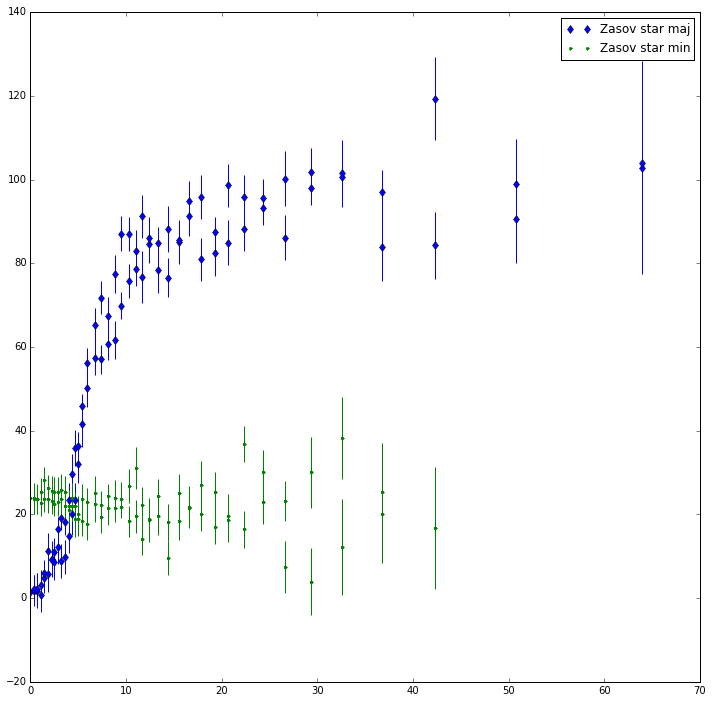

In [26]:
def incline_velocity(v, angle):
    return v / sin(angle * pi / 180)

# Переносит центр в (r0,v0) и перегибает кривую вращения, 
# а также исправляет за наклон если необходимо
def correct_rotation_curve(rdata, vdata, dvdata, r0, v0, incl):
    rdata_tmp = [abs(r-r0) for r in rdata]
    vdata_tmp = [incline_velocity(abs(v-v0), incl) for v in vdata]
    data = zip(rdata_tmp, vdata_tmp, dvdata)
    data.sort()
    return zip(*data)

r_ma_b, vel_ma_b, e_vel_b = correct_rotation_curve(r_ma, vel_ma, e_vel_ma,  0.0, 242., incl)
r_mi_b, vel_mi_b, e_vel_mi_b = correct_rotation_curve(r_mi, vel_mi, e_vel_mi,  0.0, 242., incl)

plt.plot(r_ma_b, vel_ma_b, 'd', label = 'Zasov star maj')
plt.errorbar(r_ma_b, vel_ma_b, yerr=e_vel_b, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_b, vel_mi_b, '.', label = 'Zasov star min', color='green')
plt.errorbar(r_mi_b, vel_mi_b, yerr=e_vel_mi_b, fmt='.', marker='.', mew=0, color='green')
plt.legend()
plt.plot()

Как видим, сигнал вдоль малой оси существенно не нулевой. Это означает, что смещена малая полуось и что по-хорошему наш подход тут не применим. Однако, как будет видно ниже, дисперсии скоростей относительно нормальные.

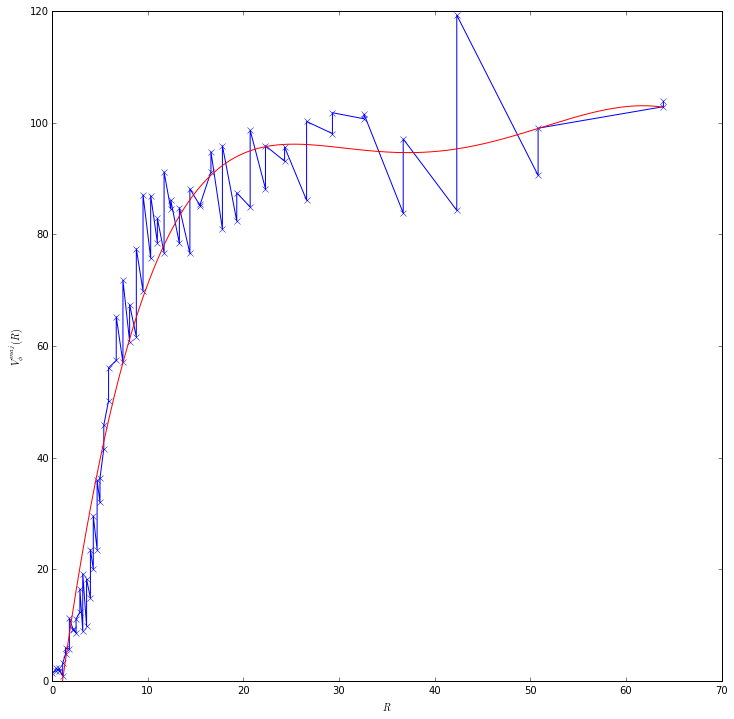

In [27]:
poly_star = poly1d(polyfit(r_ma_b, vel_ma_b, deg=5))

plt.plot(r_ma_b, vel_ma_b, 'x-', color='blue', markersize=6)
test_points = np.arange(0.0, max(r_ma_b), 0.1)
plt.plot(test_points, poly_star(test_points), '-', color='red')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V^{maj}_{\phi}(R)$')
plt.show()

In [28]:
tex_imgs_dir = "C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs"
try: 
    os.chdir(tex_imgs_dir)
except:
    tex_imgs_dir = "C:\\Users\\Alex March\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs"
    
os.chdir(tex_imgs_dir)

np.save('n4150_maj_rot', zip(r_ma_b, vel_ma_b, e_vel_b))
np.save('n4150_rot_poly', zip(test_points, poly_star(test_points)))

os.chdir("C:\\science\\2FInstability\\data\\ngc4150")

Кривая вращения нам нужна для нахождения соотношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, которое описывается уравнением ${\displaystyle \sigma_{\varphi}^{2}/\sigma_{R}^{2}=0.5\left(1+\frac{R}{\bar{v}_{\varphi}}\frac{d\bar{v}_{\varphi}}{dR}\right)}$ (Binney & Tremaine, 1987) и приближается гладко функцией $f=0.5(1+e^{-R/R_{0}}),$ где $R_{0}$ --- характерный масштаб. 

${\bf Примечание:}$ Такое приближение оправдано следующими соображениями. Для равновесного диска верно уравнение, описанное выше. Для твердотельного участка вращения в центральных областях выражение в скобках равно 2, а $\sigma_{\varphi}^{2}/\sigma_{R}^{2}=1$. На плоском участке кривой вращения на периферии диска $\sigma_{\varphi}^{2}/\sigma_{R}^{2}\thickapprox0.5$. Функция $f$ как раз аппроксимирует такое поведение отношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$.

Изобразим получившийся профиль $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$, вычисляемый через производную полинома:

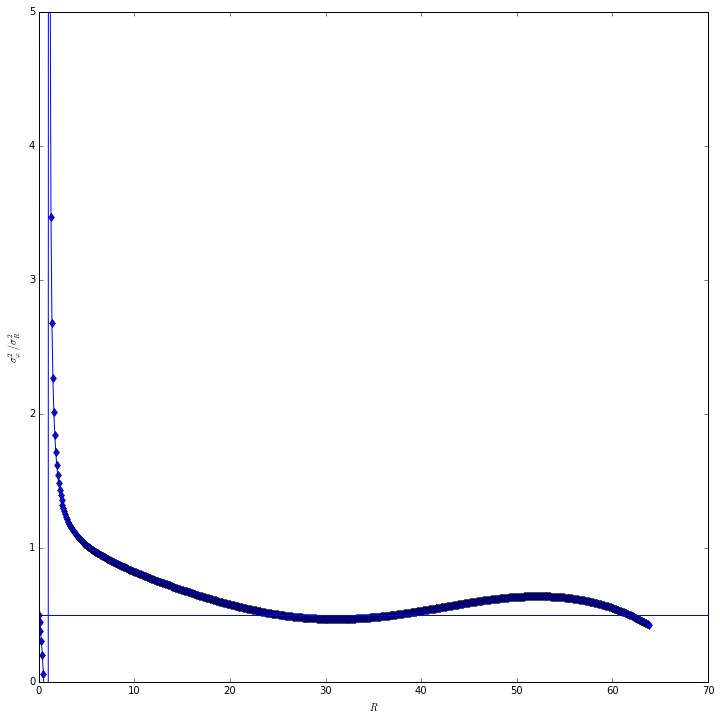

In [29]:
def sigPhi_to_sigR_real(R):
        return 0.5 * (1 + R*poly_star.deriv()(R) / poly_star(R))

plt.plot(test_points, [sigPhi_to_sigR_real(R) for R in test_points], 'd-', color='blue')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.xlabel('$R$')
plt.ylabel(r"$\sigma_{\varphi}^2/\sigma_{R}^2$")
plt.ylim(0, 5)
plt.show()

Найдем теперь характерный масштаб $f=0.5(1+e^{-R/R_{0}})$:

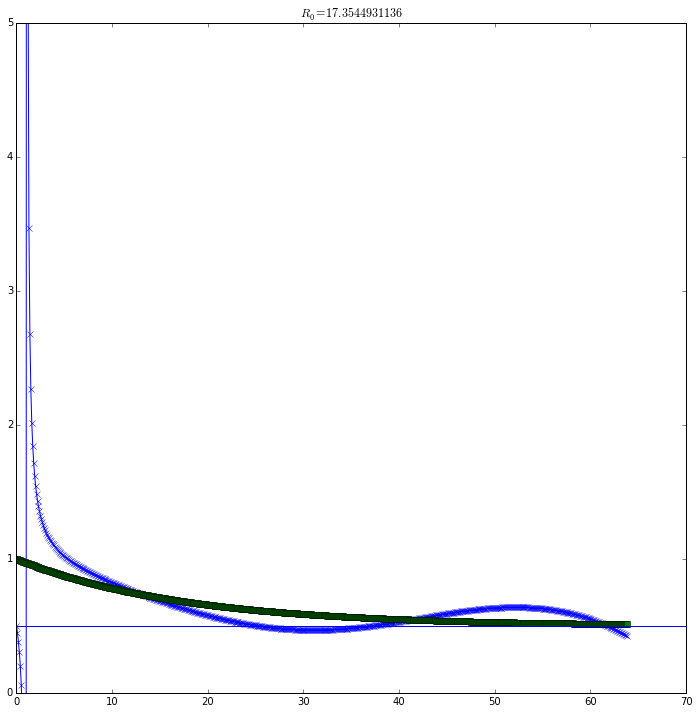

In [30]:
def f(R, Ro):
    return 0.5*(1 + np.exp( -R/Ro ))

xdata = test_points
ydata = sigPhi_to_sigR_real(xdata)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, xdata, ydata, p0=[1.0])
Ro = popt[0]

plt.plot(xdata, ydata, 'x-')
plt.plot(xdata, [f(p, Ro) for p in xdata], 's')
plt.axhline(y=0.5)
plt.axhline(y=0.0)
plt.title('$R_{0} = %s $' % Ro)
plt.ylim(0, 5)
plt.show()

Теперь знаем значение отношения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}$ в любой точке, заведем соответствующую функцию:

In [31]:
def sigPhi_to_sigR(R):
    return sqrt(f(R, Ro))

Построим графики дисперсий скоростей на луче зрения вдоль большой и малой оси ($\sigma_{los}^{maj}$ и $\sigma_{los}^{min}$):

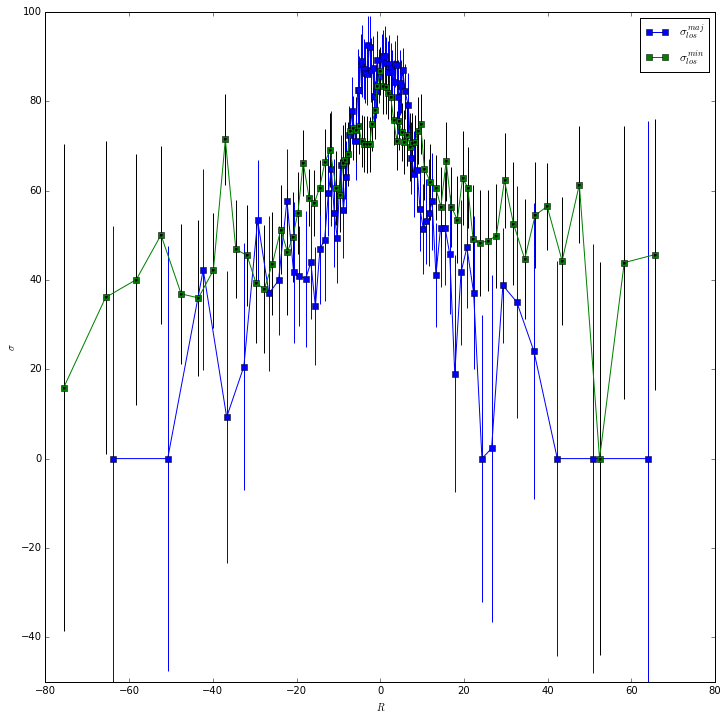

In [32]:
# Исправляем значения вдоль малой оси на синус угла:    
def correct_min(R):    
    return R / cos(incl * pi / 180) 

r_mi_extend = map(correct_min, r_mi)
    
plt.plot(r_ma, sig_ma, 's-', label='$\sigma_{los}^{maj}$')
plt.errorbar(r_ma, sig_ma, yerr=e_sig_ma, fmt='.', marker='.', mew=0, color='blue')
plt.plot(r_mi_extend, sig_mi, 's-', label='$\sigma_{los}^{min}$')
plt.errorbar(r_mi_extend, sig_mi, yerr=e_sig_mi, fmt='.', marker='.', mew=0, color='black')
plt.xlabel('$R$')
plt.ylabel('$\sigma$')
plt.legend()
plt.ylim(-50, 100)
plt.show()

Данные конечно же совершенно не вычещенные:

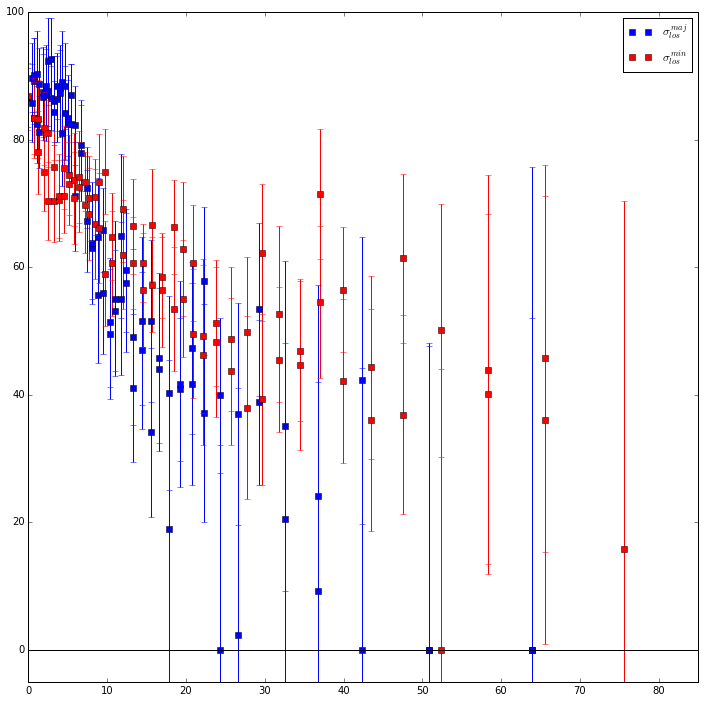

In [33]:
bind_curve = lambda p: (abs(p[0]), abs(p[1]), p[2])
sig_maj_data = zip(r_ma, sig_ma, e_sig_ma)
sig_maj_data = map(bind_curve, sig_maj_data)
sig_maj_data.sort()
radii_maj, sig_maj_p, e_sig_maj_p = zip(*sig_maj_data) 

sig_min_data = zip(r_mi_extend, sig_mi, e_sig_mi)
sig_min_data = map(bind_curve, sig_min_data)
sig_min_data.sort()
radii_min, sig_min_p, e_sig_min_p = zip(*sig_min_data) 

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='red')
plt.legend()
plt.ylim(-5.,100)
plt.xlim(0,85)
plt.axhline(y=0., c='black')
plt.show()

Уберем лишние точки (нулевые, отступающие), отрежем центральную часть (до 8 секунд) и 

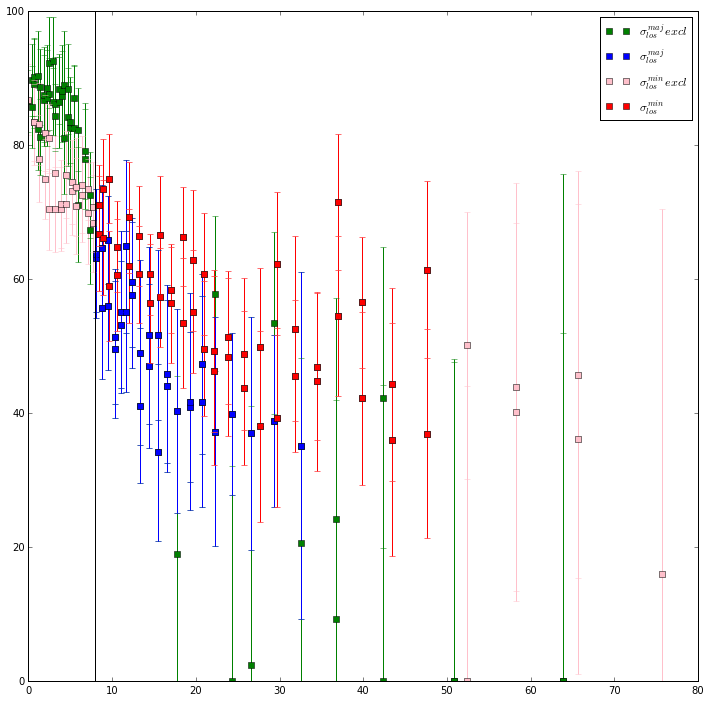

In [34]:
# Граница. по которой обрезаем
cutted = 8.

os.chdir(tex_imgs_dir)

s_maj_data = zip(radii_maj, sig_maj_p, e_sig_maj_p)
#Обрезаем данные по 35" и убираем нулевые значения
s_maj_data = filter(lambda x: x[1] > 30 and x[0] < 35, s_maj_data)
#Убираем два отскока:
s_maj_data = filter(lambda x: x[0] < 20 or (x[0] > 20 and x[1] < 52), s_maj_data)
np.save('n4150_maj', s_maj_data)
s_maj_data = filter(lambda l: l[0] > cutted, s_maj_data)    
    
s_min_data = zip(radii_min, sig_min_p, e_sig_min_p)
#Обрезаем данные по 50" и убираем нулевые значения
s_min_data = filter(lambda x: x[0] < 50, s_min_data)
np.save('n4150_min', s_min_data)
s_min_data = filter(lambda l: l[0] > cutted, s_min_data)

os.chdir("C:\\science\\2FInstability\\data\\ngc4150")

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj} excl$', color='g')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='g')
radii_maj, sig_maj_p, e_sig_maj_p = zip(*s_maj_data)
plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')

plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min} excl$', color='pink')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='pink')
radii_min, sig_min_p, e_sig_min_p = zip(*s_min_data)
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='red')

plt.axvline(x=cutted, color='black')
plt.ylim(0., 100.)
plt.legend()
plt.show()

Приблизим сплайнами ($k=3$), а весовую функцию возьмем $w(err)=\frac{1}{1+{err}^2}$:

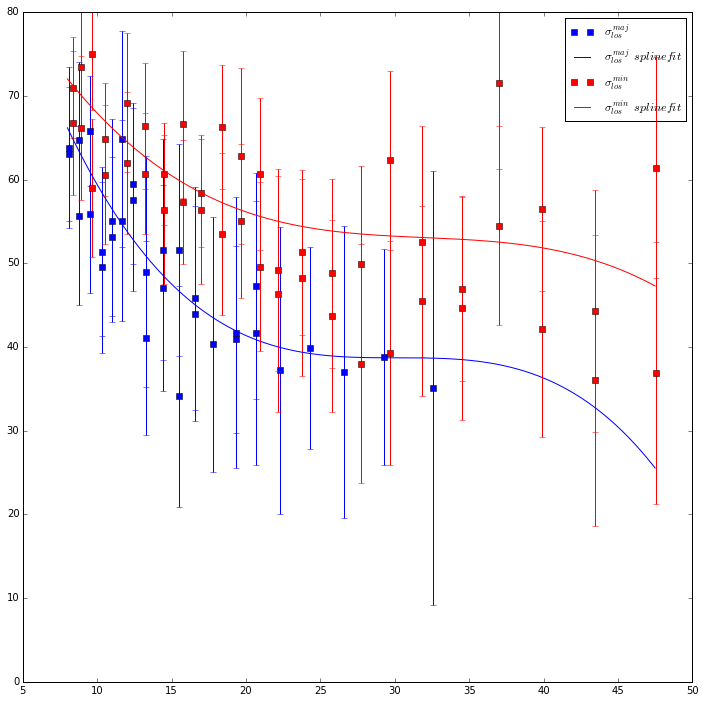

In [35]:
def w(arr):
    return map(lambda l: 1/(1. + l**2), arr)

import scipy.interpolate as inter
points = np.arange(cutted, max(radii_min), 0.1)

poly_sig_maj = inter.UnivariateSpline (radii_maj[1:], sig_maj_p[1:], k=3, s=10000., w=w(e_sig_maj_p[1:]))
poly_sig_min = inter.UnivariateSpline (radii_min[1:-1:1], sig_min_p[1:-1:1], k=3, s=10000., w=w(e_sig_min_p[1:-1:1]))

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='o', marker='.', color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj}\, splinefit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='o', marker='.', color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min}\, splinefit$', color='red')
plt.ylim(0., 80.)
plt.legend()
plt.show()

In [36]:
os.chdir(tex_imgs_dir)

# np.save('n4150_maj', zip(radii_maj, sig_maj_p, e_sig_maj_p))
# np.save('n4150_min', zip(radii_min, sig_min_p, e_sig_min_p))
np.save('n4150_min_poly', zip(points, poly_sig_min(points)))
np.save('n4150_maj_poly', zip(points, poly_sig_maj(points)))

os.chdir("C:\\science\\2FInstability\\data\\ngc4150")

Посчитаем величину невязок для полученного приближения:

In [37]:
sqerr_maj = sum(power([poly_sig_maj(p[0]) - p[1] for p in sig_maj_data], 2))
sqerr_min = sum(power([poly_sig_min(p[0]) - p[1] for p in sig_min_data], 2))

chi2_maj = sqerr_maj / len(sig_maj_p)
chi2_min = sqerr_min / len(sig_min_p)

print "Poly chi^2 for maj full = %s, mean = %s" % (sqerr_maj, chi2_maj)
print "Poly chi^2 for min full = %s, mean = %s" % (sqerr_min, chi2_min)

Poly chi^2 for maj full = 17840.5701601, mean = 557.517817504
Poly chi^2 for min full = 14191.6395828, mean = 308.513903974


Методика восстановления профилей $\sigma_{R}(R)$, $\sigma_{\varphi}(R)$ и $\sigma_{z}(R)$ следующая. Представим, что $\sigma_{Z}/\sigma_{R} \equiv \alpha \equiv const$. Тогда, зная значения $\sigma_{\varphi}^{2}/\sigma_{R}^{2}=f(R)$ в каждой точке, получаем из уравнений, описанных выше: $$\sigma_{los,maj}^2=\sigma_R^2[f\sin^2i+\alpha^2\cos^2i]$$ $$\sigma_{los,min}^2=\sigma_R^2[\sin^2i+\alpha^2\cos^2i]$$
Представим теперь $\sigma_R(R)=\sigma_{R,0}\times F(R)$, где $F(0)=1$. Значение в квадратных скобках для $\sigma_{los,min}$ равно константе и, следуя предположению, получаем представление для дисперсии вдоль луча зрения для малой оси как $\sigma_{los,min}(R)=\sigma_{min,0}\times F(R)$. Очевидно $\sigma_{min,0} = \sigma_{los,min}(0)$, а значит мы знаем в каждой точке значение $F(R)=\sigma_{los,min(R)}/\sigma_{min,0}$. Описанная выше система уравнений вырождается в следующую:
$$\sigma_{los,maj}^2(R)=\frac{\sigma_{R,0}^2\sigma_{los,min}^2(R)[f\sin^2i+\alpha^2\cos^2i]}{\sigma_{min,0}^2}$$ $$\sigma_{min,0}^2=\sigma_{R,0}^2\sin^2i+\sigma_{R,0}^2\alpha^2\cos^2i$$
Сделаем замену: $\sigma_{R,0}^2\sin^2 i \equiv A,\ \sigma_{R,0}^2\cos^2 i\times \alpha^2 \equiv B$. Окончательно, имеем $N+1$ линейное уравнение для $N$ точек, которые можем решить МНК: 
$$\left\{
  \begin{array}{lr}
    \sigma_{los,maj}^2(R_j)\times \sigma_{min,0}^2 =\sigma_{los,min}^2(R_j)[Af(R_j)+B]\\
    \sigma_{min,0}^2=A+B
  \end{array}
\right.
$$

Попробуем поискать точки, в которых МНК решается лучше всего:

In [38]:
#Как вычислять ошибку 
def residuals(params, xdata, ydata):
            return (ydata - np.dot(xdata, params))

#Начальное приближение (А,В)
x0 = [1000, 100]

In [39]:
#Восстановление первоначальных неизвестных
def physical_unknowns(A, B):
    sig_R_0 = round( sqrt(A) / sin(incl*pi/180), 3)
    alpha = round( sqrt(B)/ (cos(incl*pi/180) * sig_R_0), 3)
    return (sig_R_0, alpha)

#Значение sig_los_min в 0
sig_min_0 = poly_sig_min(0.)

Ns = [20, 50, 75, 100]

right_max = 60.

#Шаг сетки по расстоянию
dx = 2.

#Минимальный размер отрезка, на котором ищем ответ
min_size = 20.

lefts = np.arange(0, right_max, dx)

best = []

for n in Ns:
    result_for_N = []
    for left in lefts:
        rights = np.arange(left+min_size, right_max, dx)
        for right in rights:
            r_points = np.arange(left, right, (right-left)/n)
            eq_left = np.concatenate( ([sig_min_0**2], 
                              [poly_sig_maj(p)**2 * sig_min_0**2  for p in r_points]) )
            eq_right = np.transpose(
                        np.array([
                            np.concatenate(([1.0],
                                               [poly_sig_min(R)**2 * sigPhi_to_sigR(R)**2 for R in r_points])),
                            np.concatenate(([1.0],
                                               [poly_sig_min(R)**2 for R in r_points]))]))
            solution = scipy.optimize.leastsq(residuals, x0, args=(eq_right, eq_left))[0]
            A, B = solution[0], solution[1]
            chi2 = sum(power(residuals(solution, eq_right, eq_left), 2))/n
            if A > 0 and B > 0:
                result_for_N.append([chi2, left, right-left, A, B])
    if result_for_N.__len__() > 0:
        result_for_N.sort()
        Z,X,Y,A,B = zip(*result_for_N)
        print "For N=%s top-10 best results:" % n
        for ind in range(0, min(10, Z.__len__())):
            prin = (ind+1, Z[ind], X[ind], X[ind]+Y[ind]) + physical_unknowns(A[ind], B[ind])
            print "\t%s place: chi2 = %s in range [%s:%s]; sig_R_0 = %s alpha = %s" % prin
        if best.__len__() == 0 or best[0] > Z[0]:
            best = [Z[0], X[0], Y[0], n]

if best.__len__() > 0:
    print "Best of the best: N=%s chi2 = %s on range[%s:%s]" % (best[3], best[0], best[1], best[2]+best[1])
else:
    print "No even one solution."

For N=20 top-10 best results:
	1 place: chi2 = 31742040070.3 in range [20.0:40.0]; sig_R_0 = 42.376 alpha = 2.709
	2 place: chi2 = 51924952349.8 in range [18.0:38.0]; sig_R_0 = 53.891 alpha = 2.016
	3 place: chi2 = 54849978007.5 in range [18.0:40.0]; sig_R_0 = 58.157 alpha = 1.814
	4 place: chi2 = 86878141283.6 in range [20.0:42.0]; sig_R_0 = 57.937 alpha = 1.814
	5 place: chi2 = 91925837418.8 in range [18.0:42.0]; sig_R_0 = 66.472 alpha = 1.481
	6 place: chi2 = 97809382078.2 in range [22.0:42.0]; sig_R_0 = 56.582 alpha = 1.874
	7 place: chi2 = 123106797132.0 in range [16.0:40.0]; sig_R_0 = 74.666 alpha = 1.219
	8 place: chi2 = 130642670436.0 in range [16.0:38.0]; sig_R_0 = 73.685 alpha = 1.25
	9 place: chi2 = 134920840535.0 in range [16.0:36.0]; sig_R_0 = 75.702 alpha = 1.185
	10 place: chi2 = 138276174250.0 in range [16.0:42.0]; sig_R_0 = 78.724 alpha = 1.093
For N=50 top-10 best results:
	1 place: chi2 = 36578098418.4 in range [20.0:40.0]; sig_R_0 = 43.083 alpha = 2.654
	2 place: ch

Заведе функции для построения профилей дисперсий скоростей:

In [40]:
def sigR_exp(R):
    return sig_R_0*poly_sig_min(R)/sig_min_0

def sigZ_exp(R):
    return alpha * sigR_exp(R)

def sigPhi_exp(R):
    return sigPhi_to_sigR(R) * sigR_exp(R)

И для профилей $\sigma_{los}^{maj}$ и $\sigma_{los}^{min}$. Связь профилей описывается следующими уравнениями: $$\sigma_{los,maj}^2=\sigma_{\varphi}^2\sin^2i+\sigma_Z^2\cos^2i$$ $$\sigma_{los,min}^2=\sigma_R^2\sin^2i+\sigma_Z^2\cos^2i$$

In [41]:
def sig_maj_exp(R):
    return sqrt(sigPhi_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

def sig_min_exp(R):
    return sqrt(sigR_exp(R)**2 * sin(incl*pi/180)**2 + sigZ_exp(R)**2 * cos(incl*pi/180)**2)

Заметим, что можно было не решать систему МНК, а честно разрешить систему из двух уравнений $$\left\{
  \begin{array}{lr}
    \sigma_{los,maj}^2(R_j)\times \sigma_{min,0}^2 =\sigma_{los,min}^2(R_j)[Af(R_j)+B]\\
    \sigma_{min,0}^2=A+B
  \end{array}
\right.
$$ относительно $A$ и $B$ для почти любого $R_j$ (а лучше даже относительно начальных неизвестных - $\sigma_{R,0}$ и $\alpha$).
Решение: $$\sigma_{R,0}^2 = \frac{\sigma_{min,0}^2}{\sin^2 i}\times\frac{1}{f(R)-1}\times(P(R)-1)$$ $$\alpha^2 = \tan^2 i\frac{f(R) - P(R)}{P(R)-1},$$ $$P(R)=\frac{\sigma_{los,maj}^2(R)}{\sigma_{los, min}^2(R)}$$ Имеет смысл также искать не $\alpha$, а $\alpha\cdot\sigma_{R,0}=\sigma_{Z,0}$.

In [42]:
cos_i, sin_i = cos(incl * pi / 180), sin(incl * pi / 180)

def P(R):
    """Отношение maj к min, как описано выше"""
    return (poly_sig_maj(R)/poly_sig_min(R))**2

def direct_solve_A(R):
    """Аналитически находим значение sig_R_0 для уравнения в точке R"""
    res = sig_min_0**2 * (P(R) - 1) / (sin_i**2 * (sigPhi_to_sigR(R)**2 - 1))
    return sqrt(res) if res > 0 else 0

def direct_solve_B(R):
    """Аналитически находим значение alpha для уравнения в точке R"""
    res = (sigPhi_to_sigR(R)**2 - P(R))/(P(R) - 1) * (sin_i/cos_i)**2
    return sqrt(res) if res > 0 else 0

def direct_find_sig_R_0(R):
    return direct_solve_A(R)

def direct_find_sig_Z_0(R):
    return direct_solve_A(R) * direct_solve_B(R)

Найдем значения $\sigma_{R,0}$ и $\sigma_{Z,0}$ для всех точек на большой оси:

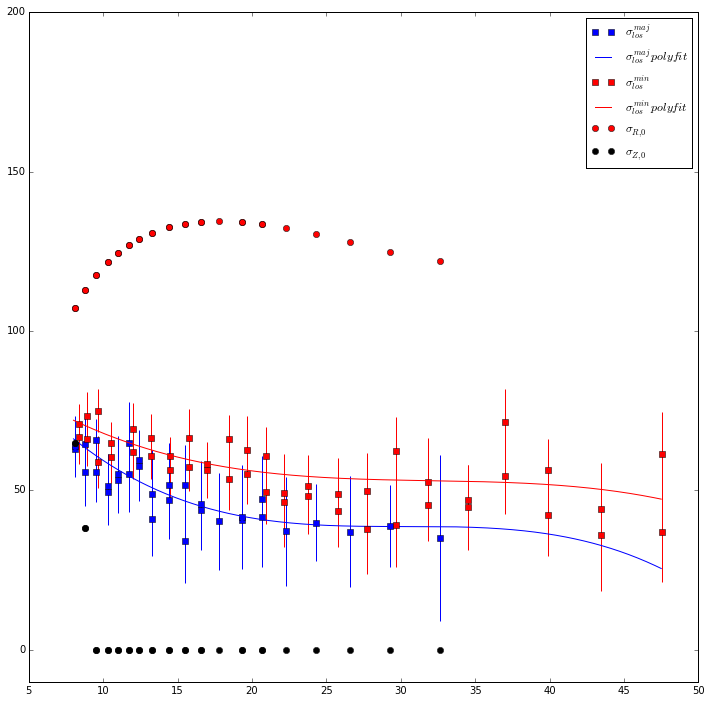

In [43]:
p_r = radii_maj

direct_sigR0 = map(direct_find_sig_R_0, p_r)
direct_sigZ0 = map(direct_find_sig_Z_0, p_r)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.plot(p_r, direct_sigZ0, 'o', color='k', label='$\sigma_{Z,0}$')

plt.legend()
plt.ylim(-10, 200)
plt.show()

Как видно - хорошо восстанавливаются значения $\sigma_{R,0}$ - лежат относительно одной прямой, найдем их среднее:

In [44]:
#Обрежем по 12
q=12.
ind_q = p_r.index(filter(lambda l: l > q, p_r)[0])

poly_q = poly1d(polyfit(p_r[ind_q:], direct_sigR0[ind_q:], deg=0))
print "sig_R poly mean = %s" % poly_q[0]

sig_R poly mean = 131.394150713


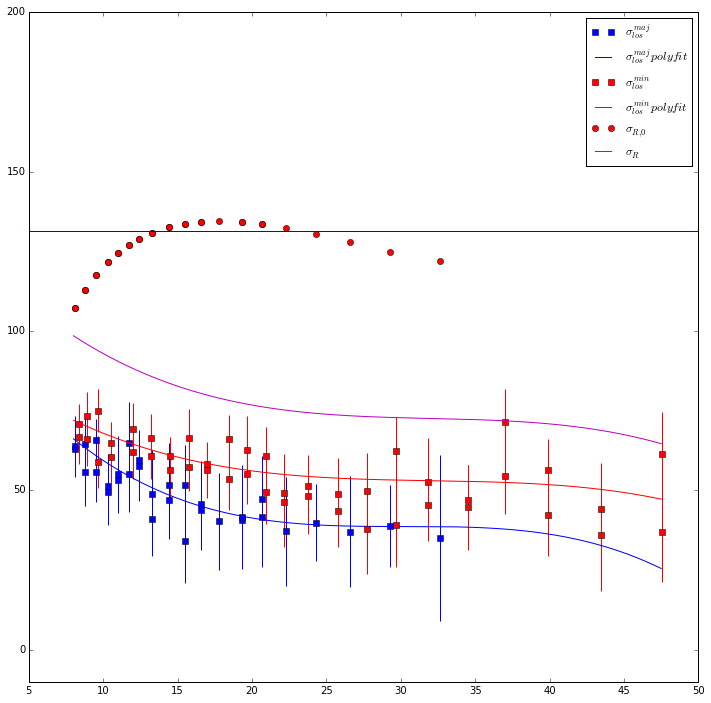

In [45]:
sig_R_0 = poly_q[0]

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.axhline(y=sig_R_0)

#Строим полученный на основе среднего профиль sig_R
plt.plot(points, poly_sig_min(points)*sig_R_0/sig_min_0, label = '$\sigma_R$', color='m')

plt.legend()
plt.ylim(-10, 200)
plt.show()

Как мы видим, значения профиля дисперсии $\sigma_R(R)$ восстанавливаются довольно надежно, однако оказываются по-видимому больше реальных и поэтому не получается восстановить профиль в вертикальном направлении. Попробуем оценить, насколько этот вклад оказывается переоценен в данном случае. Известно, что отношение $\sigma_Z/\sigma_R$ не может быть меньше некоего порогового значения, в противном случае галактика будет неустойчива к осесимметричным изгибным возмущениям плотности. Многие авторы оценивали эту величину, в том числе Засов, однако последния статья Сотниковой и Радионова "Bending instability in galactic discs. Advocacy of the linear theory" (2013, http://arxiv.org/abs/1306.5975) продемонстрировала, что искомое попроговое значение близко к таковому, полученному из линейной теории Тумре в 1966 год и равно примерно 0.3. Чем это ценно для нас? Если мы примем, что $\frac{\sigma_Z}{\sigma_R} \gtrsim 0.3,$ то, исходя из уравнения $\sigma_{los,min}^2=\sigma_R^2\sin^2i+\sigma_Z^2\cos^2i$ можем получить оценку сверху на значения радиальной дисперсии: $$\frac{\sigma_{los,min}}{\sqrt{\sin^2i+0.09\cos^2i}} \gtrsim \sigma_R$$ Также аналогичную оценку, только чуть более сложную, можно сделать и для данных вдоль большой оси.


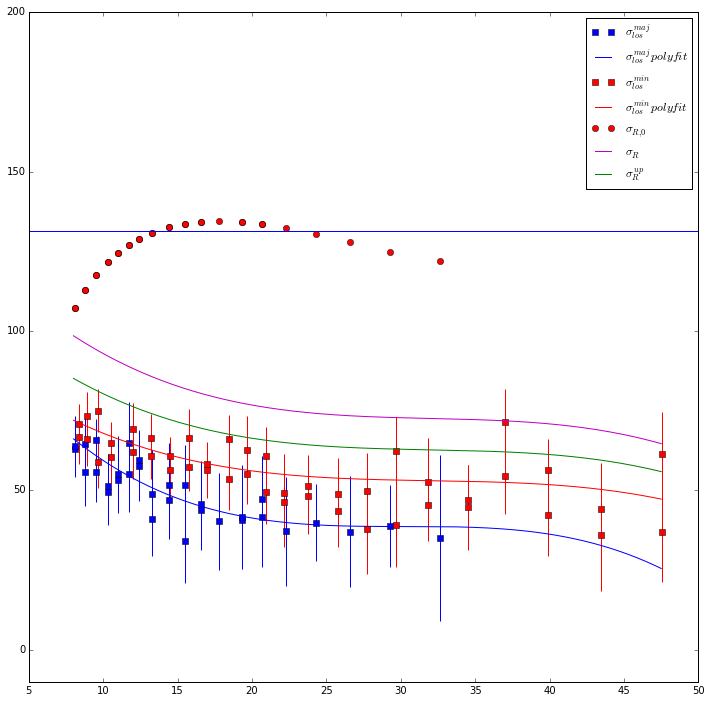

In [46]:
def sig_R_upper_lim(R, alpha):
    """Оценка сверху на sigR(R)"""
    return poly_sig_min(R)/sqrt(sin_i**2 + alpha**2 * cos_i**2)

plt.plot(radii_maj, sig_maj_p, 's', label='$\sigma_{los}^{maj}$', color='blue')
plt.errorbar(radii_maj, sig_maj_p, yerr=e_sig_maj_p, fmt='.', marker='.', mew=0, color='blue')
plt.plot(points, poly_sig_maj(points), label = '$\sigma_{los}^{maj} polyfit$', color='blue')
plt.plot(radii_min, sig_min_p, 's', label='$\sigma_{los}^{min}$', color='red')
plt.errorbar(radii_min, sig_min_p, yerr=e_sig_min_p, fmt='.', marker='.', mew=0, color='red')
plt.plot(points, poly_sig_min(points), label = '$\sigma_{los}^{min} polyfit$', color='red')

plt.plot(p_r, direct_sigR0, 'o', color='r', label='$\sigma_{R,0}$')
plt.axhline(y=sig_R_0)
plt.plot(points, poly_sig_min(points)*sig_R_0/sig_min_0, label = '$\sigma_R$', color='m')
plt.plot(points, [sig_R_upper_lim(R, 0.3) for R in points], label = '$\sigma_R^{up}$', color='g')

plt.legend()
plt.ylim(-10, 200)
plt.show()

Как видим, значения действительно оказались сильно переоценены.

Теперь то, с чего надо было начинать - построим картинки для разных значений $\alpha$ и $\sigma_{R,0}$. Для того, чтобы найти где минимум, попробуем построить просто двумерные карты $\chi^2$ для разных $\sigma_{R,0}$  $\alpha$: (это очень долго, так что пересчитывать в крайнем случае) 

In [47]:
alphas = np.arange(0.1, 1.2, 0.03)
sigmas = np.arange(10.0, 300, 3.)

def calc_chi2_normal(obs, obserr, predicted):
    return sum([(o-p)**2/err**2 for (o,p,err) in zip(obs, predicted, obserr)])/len(obs)

def compute_chi2_maps(alphas=(), sigmas=()):
    '''Вычисляем все изображения, чтобы потом только настройки менять'''
    image_min = np.random.uniform(size=(len(sigmas), len(alphas)))
    image_maj = np.random.uniform(size=(len(sigmas), len(alphas)))
    image = np.random.uniform(size=(len(sigmas), len(alphas)))
    for i,si in enumerate(sigmas):
        for j,al in enumerate(alphas):
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
#             sqerr_maj = sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data)
#             sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
#             sqerr_maj = sum([(sig_maj_exp(p[0]) - p[1])**2/p[2]**2 for p in sig_maj_data])
#             sqerr_min = sum([(sig_min_exp(p[0]) - p[1])**2/p[2]**2 for p in sig_min_data])
            sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
            sqerr_min = calc_chi2_normal(sig_min_p, e_sig_min_p, [sig_min_exp(r) for r in radii_min])
            sqerr_sum = 0.5*sqerr_maj+0.5*sqerr_min
            image[i][j] = sqerr_sum
            image_maj[i][j] = sqerr_maj
            image_min[i][j] = sqerr_min
    return image, image_maj, image_min

pics_path = '.cutted\\pics\\'
if not os.path.exists(pics_path):
    os.makedirs(pics_path)
if os.path.isfile(pics_path + 'chi2_map.npy'):
    image = np.load(pics_path + "chi2_map.npy")
    image_maj = np.load(pics_path + "chi2_map_maj.npy")
    image_min = np.load(pics_path + "chi2_map_min.npy")
else:
    image, image_maj, image_min = compute_chi2_maps(alphas=alphas, sigmas=sigmas)
    np.save(pics_path + 'chi2_map', image)
    np.save(pics_path + 'chi2_map_maj', image_maj)
    np.save(pics_path + 'chi2_map_min', image_min)

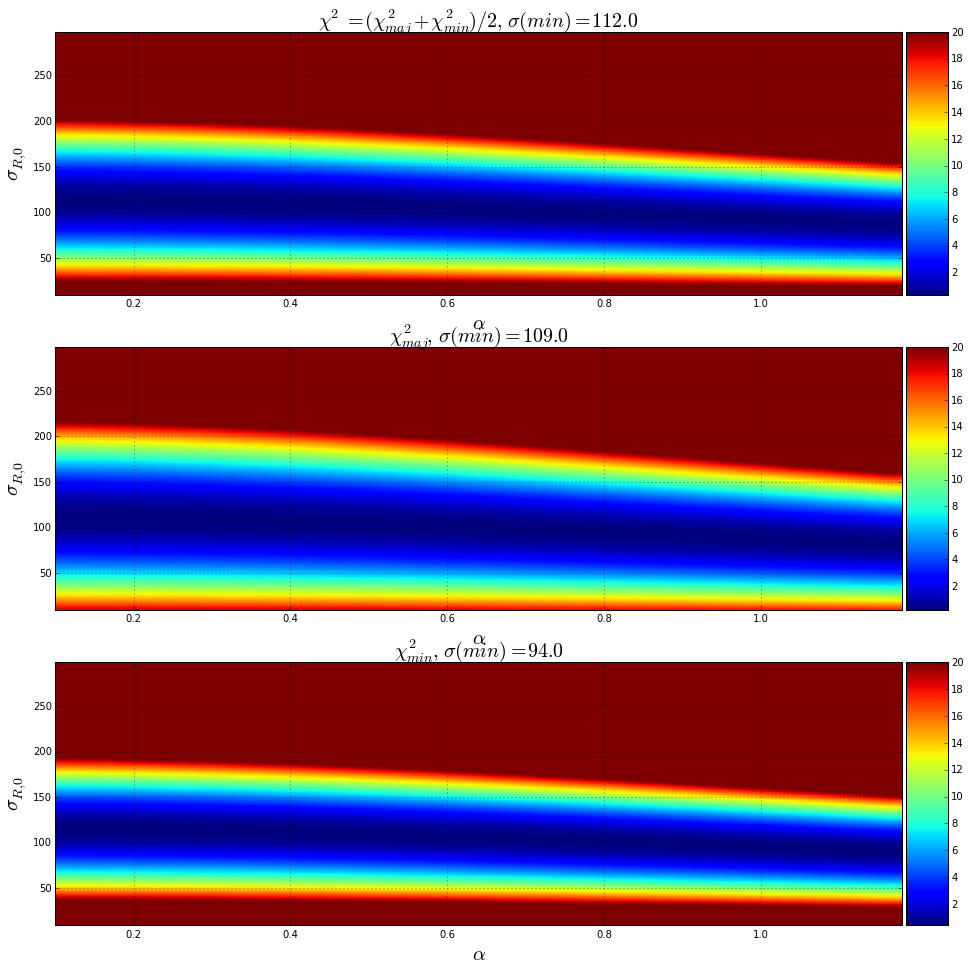

In [48]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_chi2_map(image, ax, log_scale=False, title='$\chi^2$', is_contour=False, vmax=0.):
    '''Рисуем получившиеся карты.
    Colormaps: http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps'''
    if image is not None:
        if log_scale:
            image_log = np.apply_along_axis(np.log, 1, image)
            vmax = image_log.max()
        else:
            image_log = image
        if is_contour:
            norm = cm.colors.Normalize(vmax=image.max(), vmin=-image.max())
            cmap = cm.PRGn
            levels = np.linspace(start=image_log.min(), stop=vmax, num=10)
            cset=ax.contour(image_log, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
        im = ax.imshow(image_log, cmap='jet', vmin=image_log.min(), vmax=vmax, interpolation='spline16', 
                   origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        min_sigma = sigmas[int(np.where(image == image.min())[0])]        
        ax.set_title(title + '$,\ \sigma(min)=%s$' % min_sigma, size=20.)
        ax.set_ylabel('$\sigma_{R,0}$', size=20.)
        ax.set_xlabel(r'$\alpha$', size=20.)
        ax.grid(True)
 
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=[16,16])
plot_chi2_map(image, axes[0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=False, vmax=20.)
plot_chi2_map(image_maj, axes[1], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=20.)
plot_chi2_map(image_min, axes[2], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=20.)
plt.show()

Видно для малой оси неплохое такое вырождение. Попробуем на этой карте взять два среза: 
- вдоль вырождения по малой оси
- вдоль профиля $\sigma_R = \frac{\sigma_{los, min}}{\sqrt{\sin^2i+\alpha^2\cos^2i}}$, т.к. именно так зависят наши параметры друг от друга (т.е. параметризация по сути однопараметрическая)
Определим для этого срез по малой оси: 

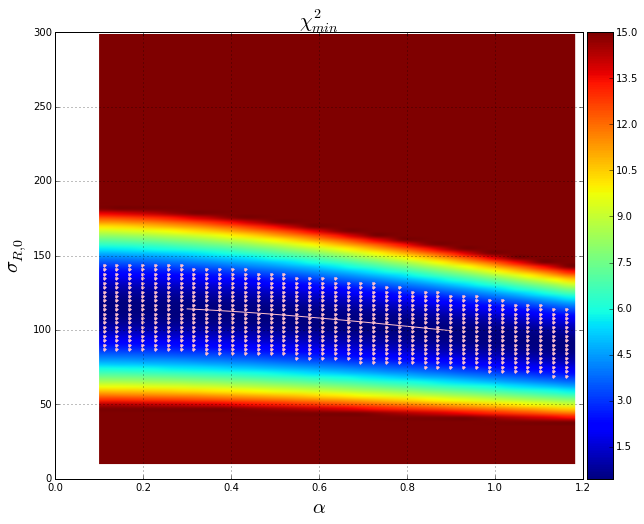

In [49]:
plt.figure(figsize=(10,8))
ax = plt.gca()
min_sigmas = np.where(image_min < image_min.min() + 3.)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
# видимо округление не правильное, добавляем шаг
slice_alph = map(lambda l: 0.01 + alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: 3.0 + sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
im = ax.imshow(image_min, cmap='jet', vmin=image_min.min(), vmax=15., interpolation='spline16', 
           origin="lower", extent=[alphas[0], alphas[-1],sigmas[0],sigmas[-1]], aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title('$\chi^2_{min}$', size=20.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)
ax.grid()
xx = np.arange(0.3, 0.9, 0.01)
ax.plot(xx, poly_slice(xx), color='pink')
plt.show()

In [50]:
alphs = np.arange(0.2, 0.9, 0.01)
err_maj, err_maj_p = [], []
err_min, err_min_p = [], []
err_mean, err_mean_p = [], []
main_slice = lambda l: sig_min_0/sqrt(sin_i**2 + cos_i**2 * l**2)

for al in alphs:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
    err_maj.append(sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data))
    err_min.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    err_mean.append(0.5*(err_maj[-1] + err_min[-1]))
    sig_R_0 = poly_slice(alpha)
    err_maj_p.append(sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data))
    err_min_p.append(sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data))
    err_mean_p.append(0.5*(err_maj_p[-1] + err_min_p[-1]))

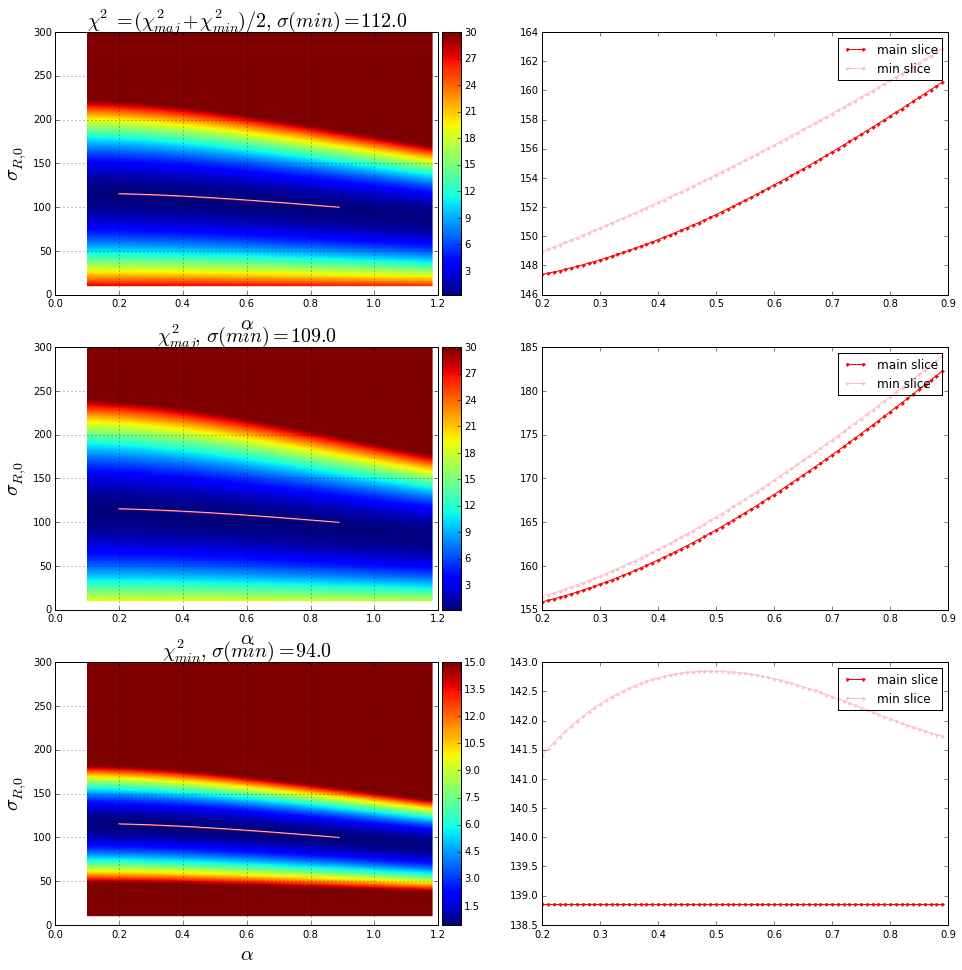

In [51]:
xx = np.arange(0.2, 0.9, 0.01)
    
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=False, figsize=[16,16])

plot_chi2_map(image, axes[0, 0], log_scale=False, title='$\chi^2 = (\chi^2_{maj} + \chi^2_{min})/2$', is_contour=False, vmax=30.)
axes[0,0].plot(xx, map(main_slice, xx), color='red')
axes[0,0].plot(xx, poly_slice(xx), color='pink')

axes[0, 1].plot(alphs, err_mean, '.-', label = 'main slice', color='red')
axes[0, 1].plot(alphs, err_mean_p, '.-', label = 'min slice', color='pink'); axes[0, 1].legend()

plot_chi2_map(image_maj, axes[1, 0], log_scale=False, title='$\chi^2_{maj}$', is_contour=False, vmax=30.)
axes[1,0].plot(xx, map(main_slice, xx), color='red')
axes[1,0].plot(xx, poly_slice(xx), color='pink')

axes[1, 1].plot(alphs, err_maj, '.-', label = 'main slice', color= 'red')
axes[1, 1].plot(alphs, err_maj_p, '.-', label = 'min slice', color= 'pink'); axes[1, 1].legend()

plot_chi2_map(image_min, axes[2, 0], log_scale=False, title='$\chi^2_{min}$', is_contour=False, vmax=15.)
axes[2,0].plot(xx, map(main_slice, xx), color='red')
axes[2,0].plot(xx, poly_slice(xx), color='pink')

axes[2, 1].plot(alphs, err_min, '.-', label = 'main slice', color= 'red')
axes[2, 1].plot(alphs, err_min_p, '.-', label = 'min slice', color='pink'); axes[2, 1].legend()

plt.show()

Как видно, вне заисимости от $\alpha$ значения $\sigma_{R,0}$ оказываются равными 110$\pm$10. Однако значения $\chi^2$ около 200, что слишком много по сравнению с примерно 70 в первоначальном приближении. Научимся также изображать сами восстановленные профили при разбросе параметров: 

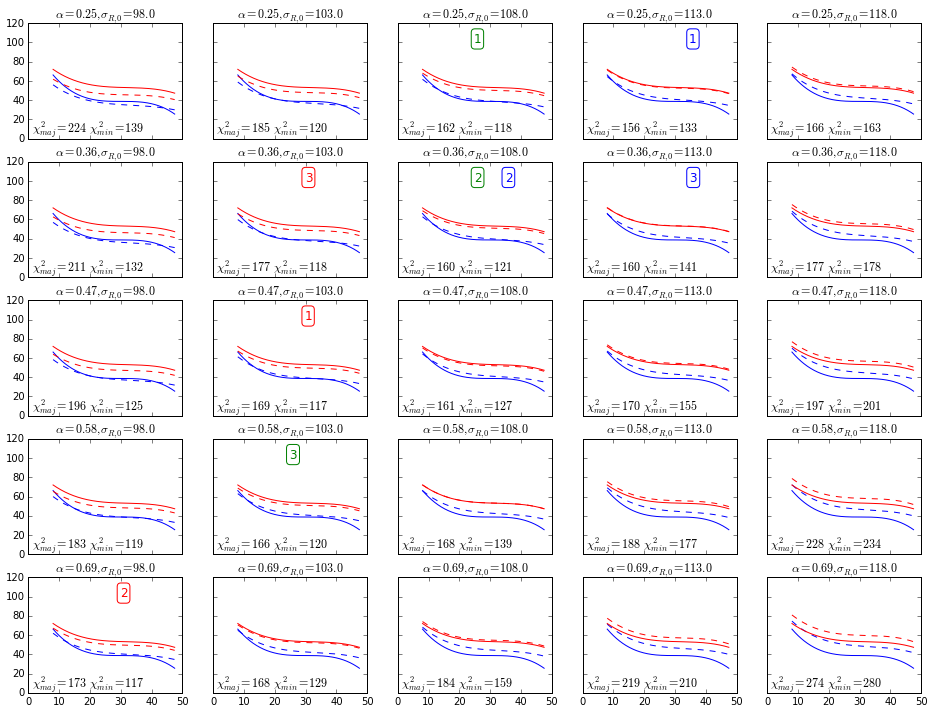

In [52]:
# Перебор alpha
alphas = np.arange(0.25, 0.7, 0.11)

# Перебор sig_R_0
sigmas = np.arange(98., 120., 5.)

# Те картинки, на которые стоит обратить особое внимание
good_pics = []

def plot_ranges(sigmas_range, alphas_range, good_pics=[], calc_chi=False, best_err=3):
    '''
    Для всех предложенных вариантов sigR и alpha
    рисует графики исходных и восстановленных дисперсий скоростей los.
    Если calc_chi = True, то также считает ошибку по наблюдаемым точкам.
    Если ошибка считается, то отмечаются best_err лучших (наименьших) результата.
    Синий - для большой оси, красный - малой, зеленый - полусумма.
    Изменяет глобальные значения sig_R_0 и alpha!'''
    nrows = alphas.size
    ncols = sigmas.size
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=[16,12])
    plt_index = 0
    # Последнее - среднее геометрическое
    sqerr_majs, sqerr_mins, sqerr_mean = [],[],[]
    for al in alphas_range:
        for si in sigmas_range:
            global alpha, sig_R_0
            alpha = al
            sig_R_0 = si
            ax = axes[plt_index/ncols, plt_index % ncols]
            ax.set_title(r'$\alpha = %s, \sigma_{R,0}=%s$' % (al,si))
            ax.plot(points, poly_sig_maj(points), '-', color='blue')
            ax.plot(points, [sig_maj_exp(Rr) for Rr in points], '--', color='blue')
            ax.plot(points, poly_sig_min(points), '-', color='red')
            ax.plot(points, [sig_min_exp(R) for R in points], '--', color='red')
            if calc_chi:
                sqerr_maj = sum(power([sig_maj_exp(p[0]) - p[1] for p in sig_maj_data], 2))/len(sig_maj_data)
                sqerr_min = sum(power([sig_min_exp(p[0]) - p[1] for p in sig_min_data], 2))/len(sig_min_data)
                ax.text(1, 5, "$\chi^2_{maj}=%5.0f\, \chi^2_{min}=%5.0f$" % (sqerr_maj, sqerr_min), fontsize=12)
                sqerr_majs.append(sqerr_maj);sqerr_mins.append(sqerr_min)
                sqerr_mean.append(0.5*sqerr_maj+0.5*sqerr_min)
            ax.set_ylim(0, 120)
            ax.set_xlim(0, 50)
            if (plt_index/ncols, plt_index % ncols) in good_pics:
                ax.plot([40], [200], 'o', markersize=12., color=(0.2,1.0,0.))
            plt_index = plt_index + 1
    if calc_chi:
        best_maj_err = heapq.nsmallest(best_err, sqerr_majs)
        for b_maj in best_maj_err:
            b_maj_ind = sqerr_majs.index(b_maj)
            ax = axes[b_maj_ind/ncols, b_maj_ind % ncols]
            #ax.plot([35], [200], 'o', markersize=12., color='b')
            ax.text(35, 100, "%s" % (best_maj_err.index(b_maj)+1), fontsize=12, color='b', 
                    bbox=dict(facecolor='none', edgecolor='b', boxstyle='round'))
        best_min_err = heapq.nsmallest(best_err, sqerr_mins)
        for b_min in best_min_err:
            b_min_ind = sqerr_mins.index(b_min)
            ax = axes[b_min_ind/ncols, b_min_ind % ncols]
            #ax.plot([30], [200], 'o', markersize=12., color='r')
            ax.text(30, 100, "%s" % (best_min_err.index(b_min)+1), fontsize=12, color='r', 
                    bbox=dict(facecolor='none', edgecolor='r', boxstyle='round'))
        best_mean_err = heapq.nsmallest(best_err, sqerr_mean)
        for b_mean in best_mean_err:
            b_mean_ind = sqerr_mean.index(b_mean)
            ax = axes[b_mean_ind/ncols, b_mean_ind % ncols]
            ax.text(25, 100, "%s" % (best_mean_err.index(b_mean)+1), fontsize=12, color='g', 
                    bbox=dict(facecolor='none', edgecolor='g', boxstyle='round'))

plot_ranges(sigmas, alphas, good_pics=good_pics, calc_chi=True)
plt.show()

Shapiro и Gerssen в статье 2003 года (http://arxiv.org/abs/astro-ph/0308489) "Observational Constraints on Disk Heating as a Function of Hubble Type" пытались проследить зависимость отношения $\sigma_Z/\sigma_R$ для галактик разных хаббловских типов. Неплохо было бы ради интереса на их график добавить и нашу полученную точку. У 4150 тип S0, т.е. располагается она левее крайней отметки.

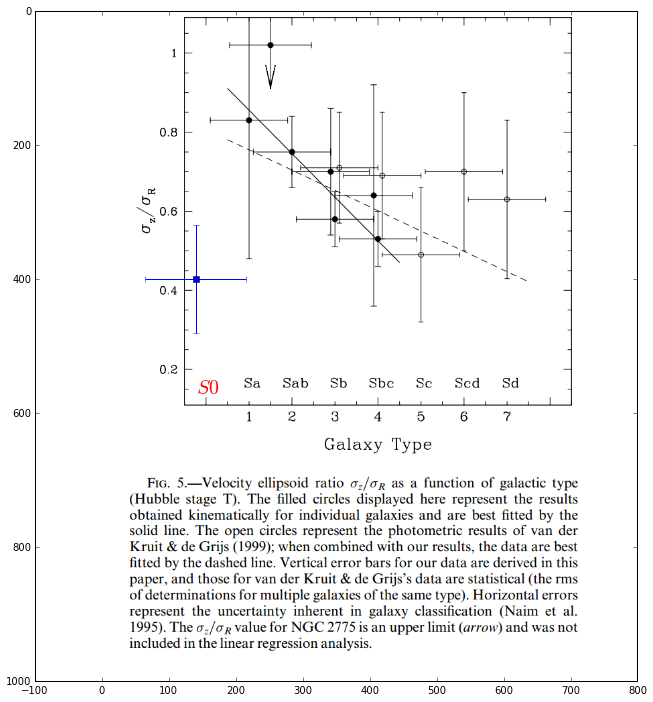

In [53]:
os.chdir("C:\\science\\2FInstability\\notebooks")

plt.imshow(np.asarray(pil.Image.open("shapiro_2003_hubble_type.png")))
# Не настоящее значение еще!
plt.plot(140, 400, 's', color='blue')
plt.errorbar(140, 400, yerr=80, xerr=75, color='blue')
plt.text(140, 570, "$S0$", fontsize=20, color='red')
plt.ylim(1000, 0)
plt.show()

Еще одно интересное приложение для тех галактик, в которых есть данные по газу. Разница между скоростями вращения звезд и газа вокруг центра галактики называется ассиметричным сдвигом и описывается следующим уравнением (Binney & Tremaine 1987): $$v_{\mathrm{c}}^{2}-\bar{v}_{\varphi}^{2}=\sigma_{R}^{2}\left(\frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}-1-\frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}-\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R}\right)\,$$
Отношение ${\displaystyle \frac{\sigma_{\varphi}^{2}}{\sigma_{R}^{2}}}$ знаем из соответствующего уравнения. Поймем, как в этом выражении вычисляется логарифмическая производная ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$. Если отношение массы к светимости принять постоянной вдоль радиуса величиной, то в производной ${\displaystyle \frac{\partial\ln\Sigma_{\mathrm{s}}}{\partial\ln R}}$ можно использовать поверхностную яркость звездного диска вместо поверхностной плотности $\Sigma_{\mathrm{s}}$ в тех полосах, которые трассируют старое звездное население. Это означает, что логарифмическая производная должна быть заменена отношением $-{\displaystyle \frac{R}{h_{\text{d}}}}\,,$ где $h_{\text{d}}$ --- экспоненциальный масштаб диска.

Таким образом, если мы восстановили профиль значений $\sigma_R$ и имеем представление о фотометрии диска галактики, то мы можем вычислить предполагаемый профиль газовой кривой вращения и сравнить его с истинным. В том случае, когда у нас нет данных по газу, мы можем их предсказать. Продемонстрируем это.

Фотометрия отсюда http://arxiv.org/abs/1002.4370 (не известно правда, насколько они хорошие) дает значение экспоненциального масштаба $h_r=0.65\, kpc$. Необходимую нам логарифмическую производную несложно посчитать, если приблизить профиль полиномом $\sigma_R(R) \equiv p(x)$: $$\frac{\partial\ln\sigma_{R}^{2}}{\partial\ln R} = \frac{2}{p(R)}\times\frac{\partial\ln p(e^{\ln R})}{\partial\ln R} = \frac{2Rp^{\prime}(R)}{p(R)}$$ Попробуем предсказать значения газовой кривой вращения для полученного выше маржинального профиля:

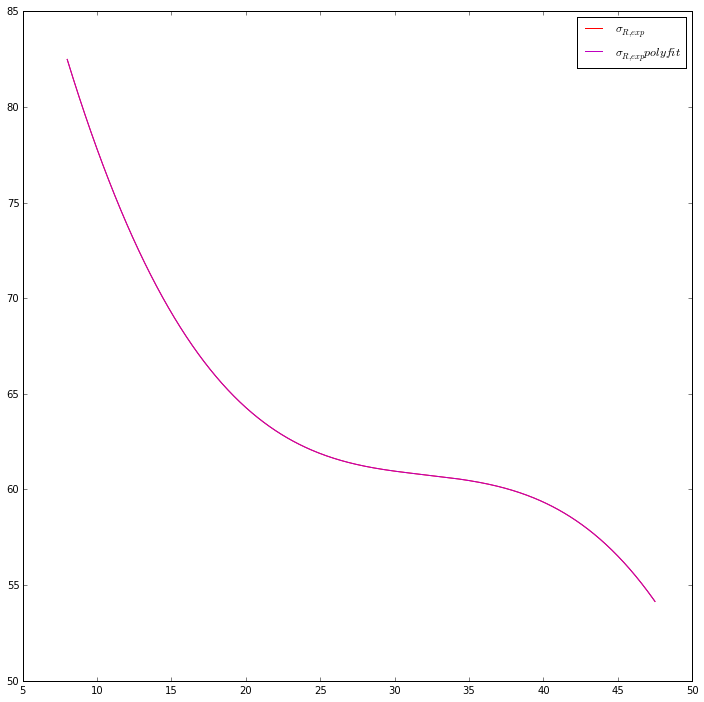

In [54]:
#Дублируем на всякий случай значения параметров
sig_R_0 = 110.
alpha = 0.3

#Приближаем полиномом
poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))

plt.plot(points, [sigR_exp(R) for R in points], '-', color='red', label='$\sigma_{R, exp}$')
plt.plot(points, [poly_marj_R(R) for R in points], '-', color='m', label='$\sigma_{R, exp} polyfit$')
plt.legend()
plt.show()

In [55]:
def log_deriv(R):
    """Вычисление логарифмической производной sig_R,
    для ассиметричного сдвига - как описано выше"""
    return 2*R * poly_marj_R.deriv()(R) / poly_marj_R(R)

#Масштаб диска в секундах
h_d = 0.65 * 1000 / scale
print "h_d = %s" % h_d

def asym_drift_value(R):
    """Вычисляем величину сдвига между квадратами скоростей газа и звезд"""
    return poly_marj_R(R)**2 * (sigPhi_to_sigR(R)**2 - 1 + R/h_d - log_deriv(R))

h_d = 59.0909090909


Нарисуем несколько кривых еще, чтобы понимать:

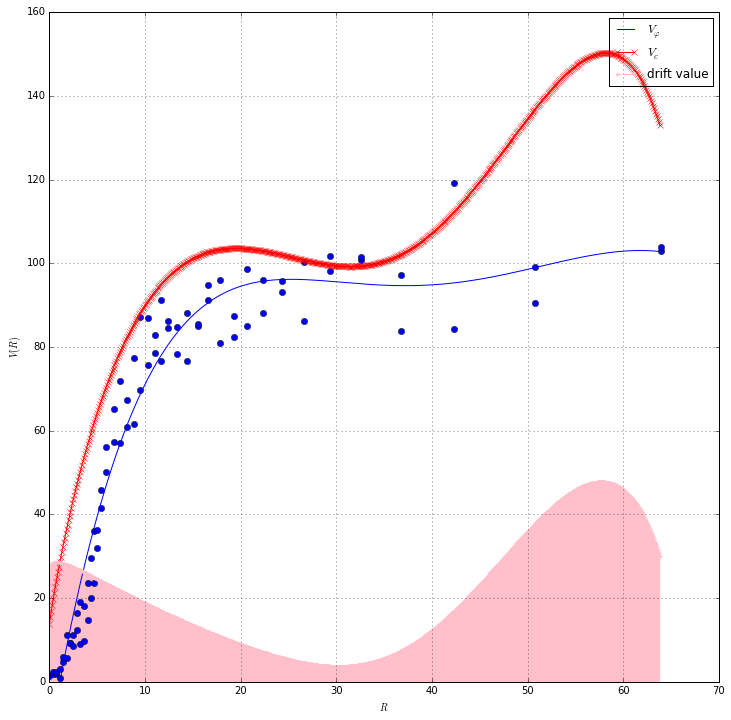

In [56]:
plt.plot(r_ma_b, vel_ma_b, 'o', color='blue', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='blue', label=r'$V_{\varphi}$')
ad = [sqrt(asym_drift_value(R) + poly_star(R)**2) for R in test_points]
plt.plot(test_points, ad, 
         'x-', color='red', label=r'$V_c$')
plt.xlabel('$R$'); plt.ylim(0)
plt.ylabel('$V(R)$')

dif = [(ad[i] - poly_star(test_points[i])) for i in range(test_points.__len__())]
plt.plot(test_points, dif, marker='.', lw=1, color = 'pink', label = 'drift value')
d = scipy.zeros(len(dif))
plt.fill_between(test_points, 0, dif, color = 'pink')

plt.grid()
plt.legend()
plt.show()

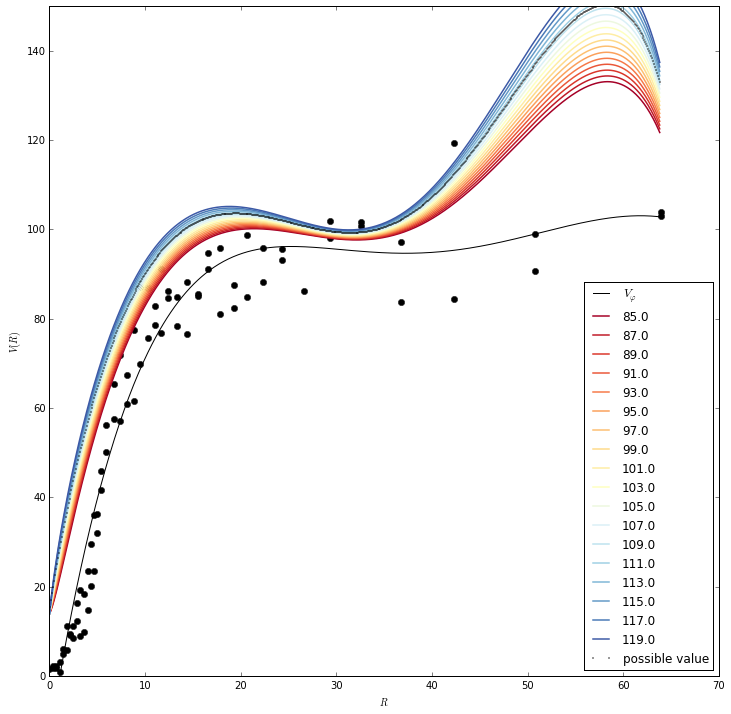

In [57]:
predict_drift = lambda l: asym_drift_value(l) + poly_star(l)**2 
predict_gas = lambda l: sqrt(predict_drift(l)) if predict_drift(l) > 0 else np.nan

sigmas = np.arange(85., 120., 2.)

plt.plot(r_ma_b, vel_ma_b, 'o', color='black', markersize=6)
plt.plot(test_points, poly_star(test_points), '-', color='black', label=r'$V_{\varphi}$')
plt.xlabel('$R$')
plt.ylabel('$V(R)$')
plt.ylim(0, 150)

for s in sigmas:
    sig_R_0 = s
    poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))
    ind = np.where(sigmas==s)[0][0]
    plt.plot(test_points, [predict_gas(R) for R in test_points], 
     '-', label=('%s' % s), lw=1.5, ms=0.5, color=plt.cm.RdYlBu(ind*1.0/len(sigmas)))
    
sig_R_0 = 110.
poly_marj_R = poly1d(polyfit(points, [sigR_exp(R) for R in points], deg=7))
plt.plot(test_points, [predict_gas(R) for R in test_points], 
     'o', label='possible value', color='black', mfc='none', markersize=1)

plt.legend(loc='lower right')
plt.show()

#Картинки для статьи

C:\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Anaconda\lib\site-packages\matplotlib\text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
C:\Anaconda\lib\site-packages\matplotlib\text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


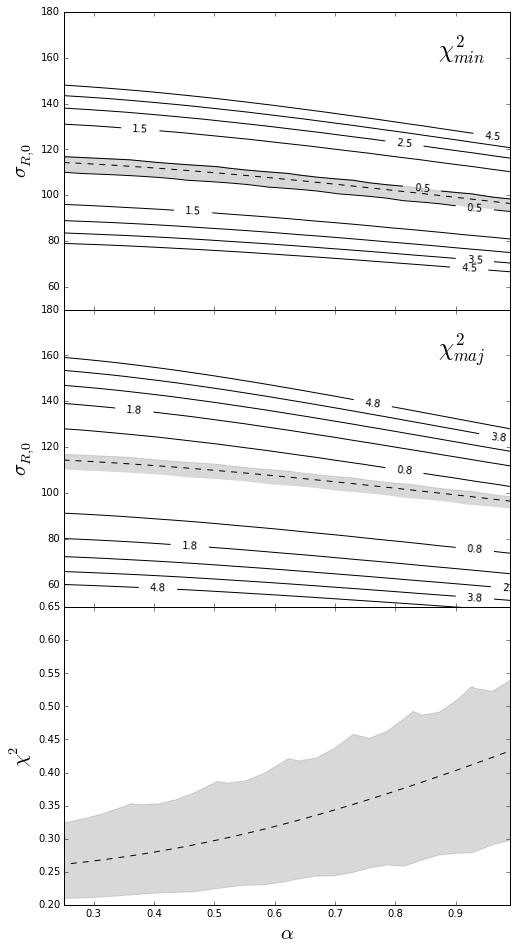

In [58]:
os.chdir("C:\\Users\\root\\Dropbox\\RotationCurves\\PhD\\paper1\\text\\imgs")

alphas = np.arange(0.1, 1.2, 0.03)
sigmas = np.arange(10.0, 300, 3.)

import matplotlib.mlab as mlab
import matplotlib

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=False, figsize=[8,16])
ax = axes[0]
# levels = [100., 125., 150., 175., 200.]
# levels = [image_min.min()+0.02, image_min.min()+0.4, image_min.min()+1.1, image_min.min()+2.1, 
#           image_min.min()+3.1, image_min.min()+4.1]
# levels = np.linspace(start=image_min.min()+0.1, stop=image_min.min()+4.1, num=5)
levels = np.linspace(start=image_min.min()*1.1, stop=image_min.min()*1.1+4, num=5)
# im = ax.imshow(image_min, cmap='jet', vmin=image_min.min(), vmax=20., interpolation='spline16', 
#                    origin="lower", aspect="auto")
# plt.show()
cset=ax.contour(image_min, levels,  colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
min_map_gutter = cset.collections[0].get_paths()
v1,v2 = min_map_gutter[1].vertices, min_map_gutter[0].vertices
x1,x2 = v1[:,0], v2[:,0]
y1,y2 = v1[:,1], v2[:,1]
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 160, '$\chi^2_{min}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')
ax.set_ylim(50, 180)
ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')


min_sigmas = np.where(image_min < image_min.min() + 0.03)
slice_alph, slice_sig = min_sigmas[1], min_sigmas[0]
slice_alph = map(lambda l: alphas[0] + (alphas[-1] - alphas[0])*l/len(image_min[0]) , slice_alph)
slice_sig = map(lambda l: sigmas[0] + (sigmas[-1] - sigmas[0])*l/len(image_min), slice_sig)
# ax.plot(slice_alph, slice_sig, '.', color='pink')
poly_slice = poly1d(polyfit(slice_alph, slice_sig, deg=3))
# ax.plot(xx, poly_slice(xx), '.-', color='black')

ax = axes[1]
# levels = np.linspace(start=image_maj.min()-4.3, stop=10., num=10)
# levels = [7., 10., 50., 100.]
# levels = [image_maj.min()+0.4, image_maj.min()+0.7, image_maj.min()+1.1, image_maj.min()+2.1, image_maj.min()+3.1, 
#           image_maj.min()+4.1]
levels = np.linspace(start=image_min.min()+0.4, stop=image_min.min()+4.4, num=5)
cset=ax.contour(image_maj, levels, hold='on', colors = 'k', origin='lower', extent=[alphas[0],alphas[-1],sigmas[0],sigmas[-1]])
plt.clabel(cset, inline=1, fontsize=10, fmt='%1.1f',)
ax.text(0.87, 160, '$\chi^2_{maj}$', size = 24.)
ax.set_ylabel('$\sigma_{R,0}$', size=20.)
xx = np.arange(0.25, 1.0, 0.01)
ax.plot(xx, map(main_slice, xx), '--', color='black')

ax.fill_between(x1, y1, 0, color='gray', alpha=0.3)
ax.fill_between(x2, y2, 0, color='white')
ax.set_ylim(50, 180)

ax = axes[2]
err_maj = []
for al in alphas:
    global alpha, sig_R_0
    alpha = al
    sig_R_0 = main_slice(al)
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj.append(sqerr_maj)
ax.plot(alphas, err_maj, '--', color='black')
err_maj1 = []
for pa in zip(x2,y2):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj1.append(sqerr_maj)
# ax.plot(x2, err_maj1, '-', color='black')
err_maj2 = []
for pa in zip(x1,y1):
    global alpha, sig_R_0
    alpha = pa[0]
    sig_R_0 = pa[1]
    sqerr_maj = calc_chi2_normal(sig_maj_p, e_sig_maj_p, [sig_maj_exp(r) for r in radii_maj])
    err_maj2.append(sqerr_maj)
# ax.plot(x1, err_maj2, '-', color='black')
ax.set_ylabel(r'$\chi^2$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)

import scipy.interpolate as sp
f1 = sp.interp1d(x2, err_maj1, kind='linear')
ax.fill_between(x1, map(f1, x1), err_maj2, color='grey', alpha=0.3)
# f2 = sp.interp1d(x1, err_maj2, kind='linear')
# ax.fill_between(x2, map(f2, x2), err_maj1, color='grey', alpha=0.3)

ax.set_ylabel(r'$\chi^2$', size=20.)
ax.set_xlabel(r'$\alpha$', size=20.)

# ax.set_ylim(3.1, 3.5)


fig.subplots_adjust(hspace=0.)
axes[0].yaxis.get_major_ticks()[0].set_visible(False)
axes[1].yaxis.get_major_ticks()[0].set_visible(False)
ax.set_xlim(0.25, 0.99)

plt.savefig('ngc4150_maps.eps', format='eps')
plt.savefig('ngc4150_maps.png', format='png')
plt.savefig('ngc4150_maps.pdf', format='pdf', dpi=150)

plt.show()